In [1]:
# Direct lammps script implemetation in pyiron 
from tempfile import tempdir
from pyiron import Project
import numpy as np
import pandas
from jinja2 import Template
import matplotlib.pyplot as plt 
import scipy.constants as sc
from scipy.integrate import cumtrapz
import os
import sys
sys.path.insert(0, '/nfshome/deshmukh/vaibhav/scripts')
from vasp_out import read_OUTCAR_OSICAR

pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/vasp/K_Convergence/NASICON_benchmark_new")

In [2]:
# For different quench rate 
cpu = [12,24,36,48,60,72,84,96]

for i in cpu:
    job=pr['benchmark_vasp_without_%s'%i]
    #job.output.energy_pot[-1]
    job.transfer_from_remote()
    job.compress()

/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
100%|██████████| 1/1 [00:02<00:00,  2.66s/it]
/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/pysqa/utils/remote.py:235: UserWarning: 
  warnings.warn(stderr.read().decode())
  0%|          | 0/35 [00:00<?, ?it/s]Exception during reset or similar
Traceback (most recent call last):
  File "/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "/nfshome/deshmukh/miniconda3/envs/vaibhav/lib/python3.9/site-packages/sqlalchemy/engine/default.py", line 682, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread ca

In [3]:
av_t_scf = []
elps_t = []
cpu = [12,24,36,48,60,72,84,96]
for i in cpu:
    scf,av_t, el_t, en_atom = read_OUTCAR_OSICAR.time_vasp(job=pr['benchmark_vasp_without_%s'%i])
    av_t_scf.append(av_t)
    elps_t.append(el_t)

2022-10-22 01:17:43,452 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:17:43,459 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:17:43,479 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:17:53,435 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:17:53,442 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:17:53,461 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:18:02,870 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:02,877 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:02,897 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:18:12,900 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:12,907 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:12,926 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:18:22,424 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:22,432 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:22,451 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:18:32,299 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:32,306 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:32,325 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:18:42,218 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:42,226 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:42,245 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-22 01:18:52,103 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:52,111 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-22 01:18:52,129 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


In [12]:
elps_t

[272.719, 167.037, 141.842, 127.978, 125.103, 130.862, 127.372, 137.862]

In [4]:
av_t_scf_scan = []
elps_t_scan = []
for i in cpu:
    scf,av_t, el_t, en_atom = read_OUTCAR_OSICAR.time_vasp(job=pr['benchmark_vasp_scan%s'%i])
    av_t_scf_scan.append(av_t)
    elps_t_scan.append(el_t)

2022-09-13 17:21:25,769 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:25,776 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:25,795 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 17:21:30,454 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:30,461 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:30,479 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 17:21:34,986 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:34,993 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:35,014 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 17:21:39,555 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:39,562 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:39,581 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 17:21:44,194 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:44,200 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:44,219 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 17:21:48,736 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:48,742 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:48,761 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 17:21:53,251 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:53,258 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 17:21:53,278 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


In [6]:
print(elps_t,av_t_scf)

[272.719, 167.037, 141.842, 127.978, 125.103, 130.862, 137.862] [14.167691666666668, 8.282308333333333, 6.858833333333333, 6.050958333333333, 5.875108333333333, 6.117116666666667, 5.936808333333333]


In [50]:
av_t_scf_BO = []
elps_t_BO = []

for i in cpu:
    scf,av_t, el_t, en_atom = read_OUTCAR_OSICAR.time_vasp(job=pr['benchmark_vasp_vdw_BO_%s'%i])
    av_t_scf_BO.append(av_t)
    elps_t_BO.append(el_t)

2022-09-13 18:07:28,316 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:28,324 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:28,344 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 18:07:32,911 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:32,918 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:32,939 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 18:07:37,564 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:37,572 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:37,591 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 18:07:42,083 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:42,090 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:42,111 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 18:07:46,620 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:46,626 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:46,646 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 18:07:51,308 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:51,315 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:51,335 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-09-13 18:07:55,861 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:55,868 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-09-13 18:07:55,887 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


In [13]:
av_t_scf_CX = []
elps_t_CX = []

for i in cpu:
    scf,av_t, el_t, en_atom = read_OUTCAR_OSICAR.time_vasp(job=pr['benchmark_vasp_vdw_CX_without_%s'%i])
    av_t_scf_CX.append(av_t)
    elps_t_CX.append(el_t)

2022-10-21 21:47:30,483 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:30,490 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:30,509 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:47:35,135 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:35,142 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:35,161 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:47:39,812 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:39,819 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:39,838 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:47:44,364 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:44,371 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:44,390 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:47:48,905 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:48,912 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:48,931 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:47:53,549 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:53,555 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:53,573 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:47:58,069 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:58,076 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:47:58,095 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


2022-10-21 21:48:02,549 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:48:02,556 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenance.update.base_v0_3_to_v0_4('all').
2022-10-21 21:48:02,575 - pyiron_log - WARNING - Deprecated data structure! Returned array was converted from dtype='O' to dtype=float64 via `np.array(result.tolist())`.
Please run rewrite_hdf5() (from a job: job.project_hdf5.rewrite_hdf5() ) to update this data! To update all your data run Project.maintenanc

OUTCAR
OSZICAR
Result contains:- 1. No of SCF steps, 2. Avg SCF time (sec), 3. Elapsed time (sec), 4. Final energy (eV)


In [4]:
av_t_scf

[83.01552307692307,
 40.641846153846146,
 34.61903076923077,
 28.149515384615384,
 26.682314285714288,
 25.039199999999997,
 25.54829166666667,
 25.23186923076923]

In [5]:
ideal_ratio = [1,2,3,4,5,6,7,8]

In [15]:
act_speedup_pbe = []
for i in av_t_scf:
    act_speedup_pbe.append(av_t_scf[0]/i)
#act_speedup_pbe

act_speedup_pbe_el = []
for i in elps_t:
    act_speedup_pbe_el.append(elps_t[0]/i)
act_speedup_pbe_el

[1.0,
 1.9681866383881232,
 2.3174656876378013,
 2.7836484485311845,
 2.7913099632907765,
 3.0873488626141823,
 3.179200959713659,
 2.9321067370895424]

In [14]:
elps_t

[1616.576, 821.353, 697.562, 580.74, 579.146, 523.613, 508.485, 551.336]

In [28]:
#act_speedup_scan = []
#for i in av_t_scf_scan:
#    act_speedup_scan.append(av_t_scf_scan[0]/i)
#act_speedup_scan

#act_speedup_scan_el = []
#for i in elps_t_scan:
#    act_speedup_scan_el.append(elps_t_scan[0]/i)
#act_speedup_scan_el

In [29]:
#act_speedup_BO = []
#for i in av_t_scf_BO:
#    act_speedup_BO.append(av_t_scf_BO[0]/i)
##act_speedup_pbe##

#act_speedup_BO_el = []
#for i in elps_t_BO:
#    act_speedup_BO_el.append(elps_t_BO[0]/i)
#act_speedup_BO_el

In [30]:
act_speedup_CX = []
for i in av_t_scf_CX:
    act_speedup_CX.append(av_t_scf_CX[0]/i)
#act_speedup_pbe

act_speedup_CX_el = []
for i in elps_t_CX:
    act_speedup_CX_el.append(elps_t_CX[0]/i)
act_speedup_CX_el

[1.0,
 1.6698895095241129,
 2.0453427992372912,
 2.314273308275778,
 2.394981288660156,
 2.3928476226552746,
 2.4361867759859446,
 2.1655027932960893]

In [7]:
id_time_pbe = []
for i in ideal_ratio:
    id_time_pbe.append(av_t_scf[0]/i)
id_time_pbe

id_time_pbe_el = []
for i in ideal_ratio:
    id_time_pbe_el.append(elps_t[0]/i)
id_time_pbe_el

[1616.576,
 808.288,
 538.8586666666666,
 404.144,
 323.3152,
 269.4293333333333,
 230.93942857142858,
 202.072]

In [33]:
id_time_scan = []
for i in ideal_ratio:
    id_time_scan.append(av_t_scf_scan[0]/i)
id_time_scan

id_time_scan_el = []
for i in ideal_ratio:
    id_time_scan_el.append(elps_t_scan[0]/i)
id_time_scan_el

[1486.377, 743.1885, 495.459, 371.59425, 297.2754, 247.7295, 185.797125]

In [54]:
id_time_BO = []
for i in ideal_ratio:
    id_time_BO.append(av_t_scf_BO[0]/i)
id_time_BO

id_time_BO_el = []
for i in ideal_ratio:
    id_time_BO_el.append(elps_t_BO[0]/i)
id_time_BO_el

[1100.432,
 550.216,
 366.8106666666667,
 275.108,
 220.0864,
 183.40533333333335,
 137.554]

In [32]:
id_time_CX = []
for i in ideal_ratio:
    id_time_CX.append(av_t_scf_CX[0]/i)
id_time_CX

id_time_CX_el = []
for i in ideal_ratio:
    id_time_CX_el.append(elps_t_CX[0]/i)
id_time_CX_el

[341.11,
 170.555,
 113.70333333333333,
 85.2775,
 68.22200000000001,
 56.85166666666667,
 48.730000000000004,
 42.63875]

In [8]:
para_eff_pbe = []
for i in av_t_scf:
    eff = (i/av_t_scf[0])*100
    para_eff_pbe.append(eff)

para_eff_pbe_el = []
for i in elps_t:
    eff = (i/elps_t[0])*100
    para_eff_pbe_el.append(eff)

In [14]:
para_eff_scan = []
for i in av_t_scf_scan:
    eff = (i/av_t_scf_scan[0])*100
    para_eff_scan.append(eff)

para_eff_scan_el = []
for i in elps_t_scan:
    eff = (i/elps_t_scan[0])*100
    para_eff_scan_el.append(eff)

NameError: name 'av_t_scf_scan' is not defined

In [56]:
para_eff_BO = []
for i in av_t_scf_BO:
    eff = (i/av_t_scf_BO[0])*100
    para_eff_BO.append(eff)

para_eff_BO_el = []
for i in elps_t_BO:
    eff = (i/elps_t_BO[0])*100
    para_eff_BO_el.append(eff)

In [34]:
# Here the efficiency is with time taken for reference avg. time for 12 core vs rest :- avg_scf_time(others+including+ref)/avg_scf_time(reference=12 core)*100
para_eff_CX = []
for i in av_t_scf_CX:
    eff = (i/av_t_scf_CX[0])*100
    para_eff_CX.append(eff)

para_eff_CX_el = []
for i in elps_t_CX:
    eff = (i/elps_t_CX[0])*100
    para_eff_CX_el.append(eff)

In [27]:
# Efficiency calculations for speedup
# eff = [(actual_speedup*elapsed_time)/(ideal_speedup*elapsed_time)]*100
x = act_speedup_pbe_el   # actual speedup
y = elps_t               # elapsed time 
z = ideal_ratio          # ideal speedup  

eff_n = []

for i,j,k in zip(x,y,z):
    x = [((i*j)/(k*j))*100]
    eff_n.append(x)
    #print(x)

In [35]:
cpu = [12,24,36,48,60,72,84,96]

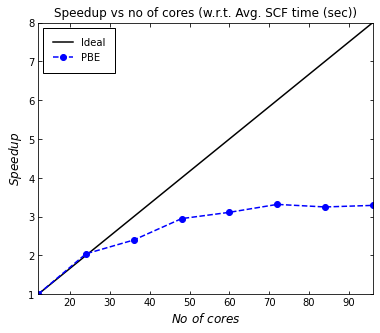

In [9]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([12, 96])
plt.ylim([1, 8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(cpu,ideal_ratio,'-',color = 'k',label='Ideal')
plt.plot(cpu,act_speedup_pbe, 'o--',color='b', label='PBE')
#plt.plot(cpu,act_speedup_scan,'g--', label='SCAN')
#plt.plot(cpu,act_speedup_BO,'r--', label='optB88-vdW')
#plt.plot(cpu,act_speedup_CX,'o--',color='m', label='vdW-DF-cx')
#plt.xticks(np.arange(0,3300,300))
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
plt.title("Speedup vs no of cores (w.r.t. Avg. SCF time (sec))")
plt.xlabel(r"$No$ $of$ $cores$", fontsize=12)
plt.ylabel("$Speedup$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#,bbox_to_anchor=(1.05,1.0))
plt.savefig("speedup_vs_no_cores_avg_scf_time_sec.png", bbox_inches='tight', dpi=600, transparent=False)

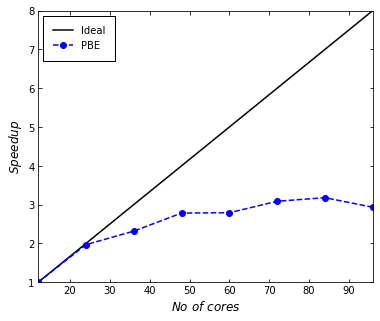

In [10]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([12, 96])
plt.ylim([1, 8])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(cpu,ideal_ratio,'k-',label='Ideal')
plt.plot(cpu,act_speedup_pbe_el, 'o--',color='b', label='PBE')
#plt.plot(cpu,act_speedup_scan_el,'g--', label='SCAN')
#plt.plot(cpu,act_speedup_BO_el,'r--', label='optB88-vdW')
#plt.plot(cpu,act_speedup_CX_el,'o--',color='m', label='vdW-DF-cx')

#plt.xticks(np.arange(0,3300,300))
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Speedup vs no of cores (w.r.t. Elapsed time (sec)")
plt.xlabel(r"$No$ $of$ $cores$", fontsize=12)
plt.ylabel("$Speedup$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#,bbox_to_anchor=(1.05,1.0))
plt.savefig("speedup_vs_no_cores_elps_time_sec.png", bbox_inches='tight', dpi=600, transparent=False)

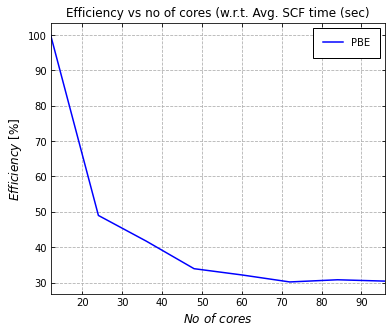

In [11]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([12, 96])
#plt.ylim([0, 100])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(cpu,para_eff_pbe, 'b-', label='PBE')
#plt.plot(cpu,para_eff_scan,'g-', label='SCAN')
#plt.plot(cpu,para_eff_BO,'r-', label='optB88-vdW')
#plt.plot(cpu,para_eff_CX,'m-', label='vdW-DF-cx')
plt.grid(which='both')
plt.grid(True, linestyle='--')
plt.title("Efficiency vs no of cores (w.r.t. Avg. SCF time (sec)")
plt.xlabel(r"$No$ $of$ $cores$", fontsize=12)
plt.ylabel("$Efficiency$ $[$%$]$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#,bbox_to_anchor=(1.05,1.0))
plt.savefig("eff_vs_no_cores_avg_scf_time_sec.png", bbox_inches='tight', dpi=600, transparent=False)

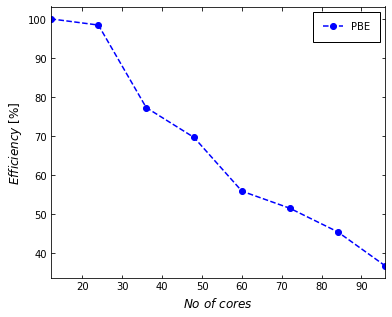

In [32]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (6,5)
plt.xlim([12, 96])
#plt.ylim([0, 100])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(axis="y",direction="in")
plt.tick_params(axis="x",direction="in")
plt.plot(cpu,eff_n, 'o--',color='b', label='PBE')
#plt.plot(cpu,para_eff_scan_el,'g-', label='SCAN')
#plt.plot(cpu,para_eff_BO_el,'r-', label='optB88-vdW')
#plt.plot(cpu,para_eff_CX_el,'m-', label='vdW-DF-cx')
#plt.grid(which='both')
#plt.grid(True, linestyle='--')
#plt.title("Efficiency vs no of cores (w.r.t. Elapsed time (sec)")
plt.xlabel(r"$No$ $of$ $cores$", fontsize=12)
plt.ylabel("$Efficiency$ $[$%$]$", fontsize=12)
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black")#,bbox_to_anchor=(1.05,1.0))
plt.savefig("eff_vs_no_cores_elps_time_sec.png", bbox_inches='tight', dpi=600, transparent=False)